# Clustering(Lesson 5)
## DBSCAN(Density Based Spatial Clustering Applications with Noise)

### First of all import needed packages

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sklearn.utils
import pandas as pd
import numpy as np
# Use this to show matplotlib and plots properly(But not essential)
%matplotlib inline

### Create dataset

In [2]:
def create_random_data_points(Number_of_samples,Centroid_locations,Cluster_deviation) :
    x , y = make_blobs(n_samples=Number_of_samples,centers=Centroid_locations,cluster_std=Cluster_deviation)
    normalized_x = StandardScaler().fit_transform(x)
    return normalized_x , y

In [3]:
Normalized_x , y_ = create_random_data_points(1500,[[4,3],[2,-1],[-1,4]],0.5)

In [4]:
print('Xs : [x y] :\n',Normalized_x[0:5])
print('----------------------------')
print('Ys :\n',y_)

Xs : [x y] :
 [[ 0.05686933 -1.37912179]
 [-1.59177971  0.96432665]
 [ 0.46482239 -1.61934478]
 [-1.72371543  0.9357714 ]
 [ 1.012702    0.18856635]]
----------------------------
Ys :
 [1 2 1 ... 1 1 2]


In [5]:
print('The shape of normalized x :',Normalized_x.shape)
print(f'{Normalized_x.shape[0]} rows and {Normalized_x.shape[1]} columns')
print('The length of y :',len(y_))

The shape of normalized x : (1500, 2)
1500 rows and 2 columns
The length of y : 1500


In [6]:
for i in range(Normalized_x.shape[0]) :
    x_point = Normalized_x[i,0]
    y_point = Normalized_x[i,1]
    center = y_[i]
    print(f'point {i+1} with x = {x_point} and y = {y_point} is in center {center}\n')
    if i+1 >= 3 :
        break

point 1 with x = 0.05686932810582844 and y = -1.3791217868623833 is in center 1

point 2 with x = -1.5917797093290766 and y = 0.9643266486578767 is in center 2

point 3 with x = 0.46482238645411944 and y = -1.6193447824930263 is in center 1



### Create and run your model

In [10]:
Epsilon = 0.3
Minimum_sample = 7 
DBSCAN_model = DBSCAN(eps=Epsilon,min_samples=Minimum_sample).fit(Normalized_x)
labels = DBSCAN_model.labels_
labels

array([0, 1, 0, ..., 0, 0, 1], shape=(1500,))

In [11]:
Core_sample_mask = np.zeros_like(DBSCAN_model.labels_,dtype=bool)
print(Core_sample_mask)

[False False False ... False False False]


In [12]:
Core_sample_mask[DBSCAN_model.core_sample_indices_] = True
print(Core_sample_mask[0:100])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True]


In [13]:
# Number of clusters in labels , ignoring noises if present
N_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
N_clusters_

3

In [14]:
# set() > will remove repetition
Unique_labels = set(labels)
print(Unique_labels)

{np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


In [15]:
Colors = plt.cm.Spectral(np.linspace(0,1,len(Unique_labels)))

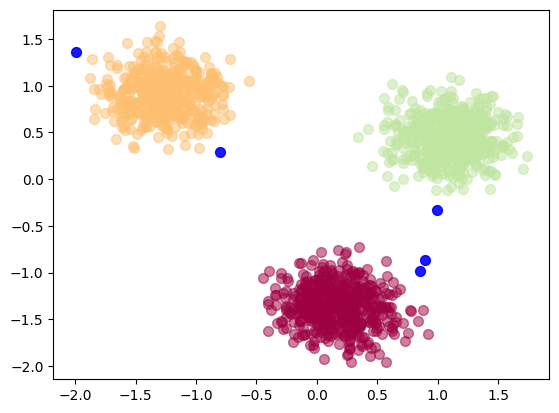

In [17]:
for k , color in zip(Unique_labels,Colors) :
    # show noise with black
    if k == -1 :
        color = 'k'
    class_member_mask = (labels == k)
    # clustered :
    xy = Normalized_x[class_member_mask & Core_sample_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c=[color],marker='o',alpha=0.5)
    # outliers :
    xy = Normalized_x[class_member_mask & ~Core_sample_mask]
    plt.scatter(xy[:,0],xy[:,1],s=50,c='blue',marker='o',alpha=0.9)

### Read the csv(Comma seperated value) file with pandas

In [18]:
Data_Frame = pd.read_csv('Weather Stations.csv')
Data_Frame.head(10)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
5,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
6,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,...,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
7,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,...,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
8,METCHOSIN,48.374,-123.561,BC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,95.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,1015105
9,NORTH COWICHAN,48.824,-123.718,BC,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,114.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,1015628


In [19]:
Data_Frame = Data_Frame[pd.notnull(Data_Frame['Tm'])]
Data_Frame = Data_Frame.reset_index(drop=True)
Data_Frame.head(10)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710
5,GALIANO NORTH,48.985,-123.573,BC,8.9,7.0,NaN,13.5,7.0,2.0,...,7.0,NaN,0.0,10.0,NaN,NaN,NaN,191.7,0.0,10130MN
6,MALAHAT,48.575,-123.530,BC,7.2,1.0,NaN,12.7,1.0,2.2,...,10.0,NaN,NaN,12.0,NaN,NaN,NaN,290.8,0.0,1014820
7,NORTH COWICHAN,48.824,-123.719,BC,7.7,0.0,NaN,14.7,0.0,-2.6,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,288.8,0.0,1015630
8,NORTH PENDER ISLAND,48.764,-123.287,BC,8.6,1.0,NaN,14.0,1.0,2.0,...,1.0,NaN,0.0,13.0,NaN,NaN,NaN,253.6,0.0,1015638
9,RACE ROCKS,48.298,-123.531,BC,9.6,0.0,NaN,15.6,0.0,5.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.7,0.0,1016640


### Visualization of all data points

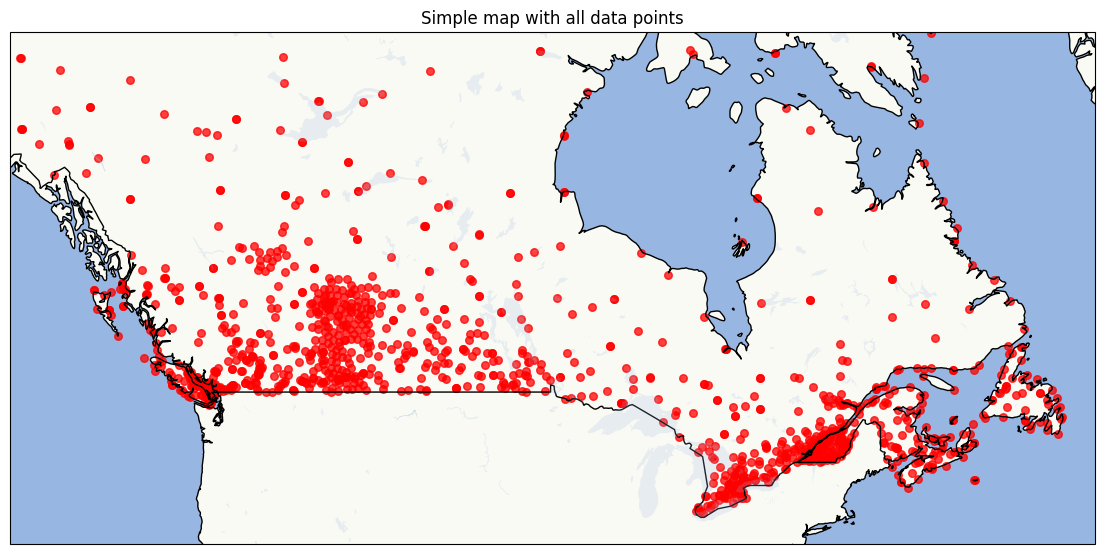

In [20]:
# Geographical boundaries
llon , ulon , llat , ulat = -140 , -50 , 40 , 65

Data_Frame = Data_Frame[(Data_Frame['Long']>llon) & (Data_Frame['Long']<ulon) & (Data_Frame['Lat']>llat) & (Data_Frame['Lat']<ulat)]
# Map
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon,ulon,llat,ulat],crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,alpha=0.3)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES,alpha=0.2)

# Converting coordinates
Data_Frame['xm'] = Data_Frame['Long']
Data_Frame['ym'] = Data_Frame['Lat']

ax.scatter(Data_Frame['xm'],Data_Frame['ym'],color='red',s=30,alpha=0.75,transform=ccrs.PlateCarree())
plt.title('Simple map with all data points')
plt.show()

### Clustering based on location

In [21]:
sklearn.utils.check_random_state(1000)
Clustered_data_set = Data_Frame[['xm','ym']]
Clustered_data_set = np.nan_to_num(Clustered_data_set)
Clustered_data_set = StandardScaler().fit_transform(Clustered_data_set)

# Compute DBSCAN
Model_DBSCAN = DBSCAN(eps=0.15,min_samples=10).fit(Clustered_data_set)
Core_samples_mask_ = np.zeros_like(Model_DBSCAN.labels_,dtype=bool)
Core_samples_mask_[Model_DBSCAN.core_sample_indices_] = True
Labels = Model_DBSCAN.labels_
Data_Frame["Clus_Db"] = Labels

Real_cluster_number = len(set(Labels)) - (1 if -1 in Labels else 0)
Cluster_number = len(set(Labels)) 

# A sample of clusters
Data_Frame[["Stn_Name","Tx","Tm","Clus_Db"]].head(100)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
...,...,...,...,...
95,IVORY ISLAND,13.0,7.2,-1
96,KEMANO,16.5,1.7,1
97,KITIMAT TOWNSITE,7.0,1.4,1
98,KITIMAT 2,10.5,2.2,1


In [22]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

### Visualization of clusters based on location

Cluster 0 , Average Temperature : -5.54
Cluster 1 , Average Temperature : 1.76
Cluster 2 , Average Temperature : -9.20
Cluster 3 , Average Temperature : -15.32
Cluster 4 , Average Temperature : -5.12
Cluster 5 , Average Temperature : -9.24


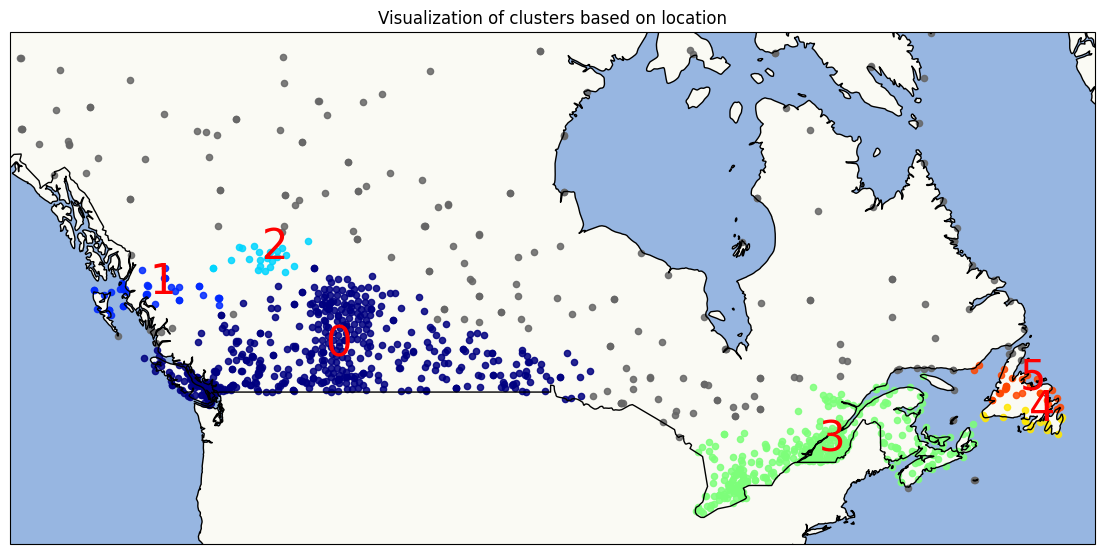

In [23]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon,ulon,llat,ulat],crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND,alpha=0.3)
ax.add_feature(cfeature.OCEAN)

# Create colormap
colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,Cluster_number))

# Draw cluster for each point
for cluster_number in set(Labels) :
    c = ([0.4,0.4,0.4]) if cluster_number == -1 else colors[int(cluster_number)]
    cluster_set = Data_Frame[Data_Frame.Clus_Db == cluster_number]
    ax.scatter(cluster_set.xm,cluster_set.ym,color=c,s=20,alpha=0.85,transform=ccrs.PlateCarree())
    if cluster_number != -1 :
        cenx , ceny = np.mean(cluster_set.xm) , np.mean(cluster_set.ym)
        plt.text(cenx,ceny,str(cluster_number),fontsize=30,color='red',transform=ccrs.PlateCarree())
        print(f"Cluster {cluster_number} , Average Temperature : {np.mean(cluster_set.Tm):.2f}")
plt.title('Visualization of clusters based on location')
plt.show()

### Clustering based on their location , max and min Temperature

In [25]:
sklearn.utils.check_random_state(1000)
Cluster_dataset = Data_Frame[['xm','ym','Tx','Tm','Tn']]
Cluster_dataset = np.nan_to_num(Cluster_dataset)
Cluster_dataset = StandardScaler().fit_transform(Cluster_dataset)

# Compute DBSCAN
DB_model = DBSCAN(eps=0.3,min_samples=10).fit(Cluster_dataset)
core_samples_mask = np.zeros_like(DB_model.labels_,dtype=bool)
core_samples_mask[DB_model.core_sample_indices_] = True
label = DB_model.labels_
Data_Frame["Clus_Db"] = label

Actual_cluster_number = len(set(label)) - (1 if -1 in label else 0)
Number_of_clusters = len(set(label)) 


# A sample of clusters
Data_Frame[["Stn_Name","Tx","Tm","Clus_Db"]].head(100)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0
...,...,...,...,...
95,IVORY ISLAND,13.0,7.2,1
96,KEMANO,16.5,1.7,-1
97,KITIMAT TOWNSITE,7.0,1.4,-1
98,KITIMAT 2,10.5,2.2,-1


In [29]:
print(Number_of_clusters)

10


### Visualization of clusters based on location and Temperture(Offline)

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Cluster 0 , Average Temperature : 6.22
Cluster 1 , Average Temperature : 6.79
Cluster 2 , Average Temperature : -0.49
Cluster 3 , Average Temperature : -13.77
Cluster 4 , Average Temperature : -4.19
Cluster 5 , Average Temperature : -16.30
Cluster 6 , Average Temperature : -13.61
Cluster 7 , Average Temperature : -9.70
Cluster 8 , Average Temperature : -4.26


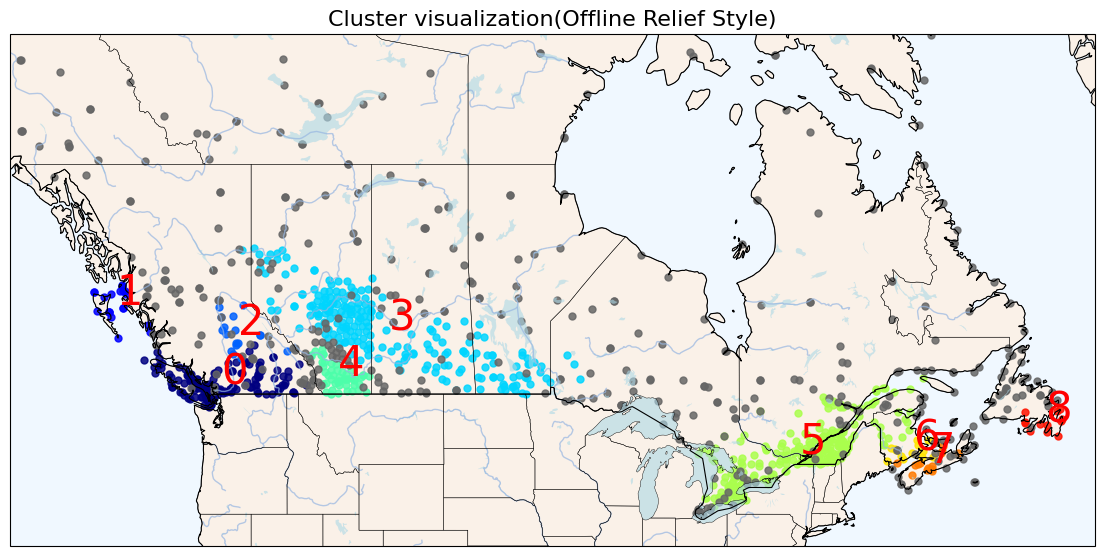

In [27]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon,ulon,llat,ulat],crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND,facecolor='linen',alpha=0.9)
ax.add_feature(cfeature.OCEAN,facecolor='aliceblue')
ax.add_feature(cfeature.LAKES,facecolor='lightblue',alpha=0.6)
ax.add_feature(cfeature.RIVERS,facecolor='lightblue',alpha=0.7)

ax.add_feature(cfeature.BORDERS,linewidth=0.8)
ax.add_feature(cfeature.COASTLINE,linewidth=0.8)
ax.add_feature(cfeature.STATES,linewidth=0.3)

colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,Number_of_clusters))

for clust_number in set(label) :
    c = ([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)]
    cluster_set_ = Data_Frame[Data_Frame.Clus_Db == clust_number]
    ax.scatter(cluster_set_.xm,cluster_set_.ym,color=c,s=25,alpha=0.85,transform=ccrs.PlateCarree())
    if clust_number != -1 :
        cenx , ceny = np.mean(cluster_set_.xm) , np.mean(cluster_set_.ym)
        plt.text(cenx,ceny,str(clust_number),fontsize=30,color='red',transform=ccrs.PlateCarree())
        print(f"Cluster {clust_number} , Average Temperature : {np.mean(cluster_set_.Tm):.2f}")
plt.title('Cluster visualization(Offline Relief Style)',fontsize=16)
plt.show()

C:\Users\veniz\Desktop\Parsa\ML-Practice\ML-VENV\Lib\site-packages\cartopy\mpl\feature_artist.py:143: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Cluster 0 , Average Temperature : 6.22
Cluster 1 , Average Temperature : 6.79
Cluster 2 , Average Temperature : -0.49
Cluster 3 , Average Temperature : -13.77
Cluster 4 , Average Temperature : -4.19
Cluster 5 , Average Temperature : -16.30
Cluster 6 , Average Temperature : -13.61
Cluster 7 , Average Temperature : -9.70
Cluster 8 , Average Temperature : -4.26


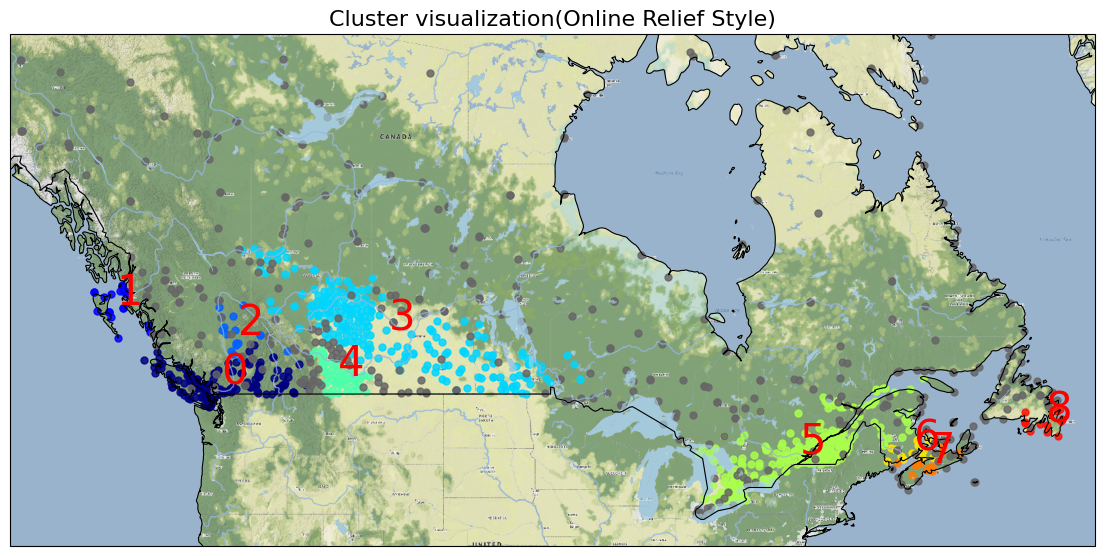

In [32]:
import cartopy.io.img_tiles as cimgt

tiler = cimgt.StadiaMapsTiles('f8d75f84-9999-496d-9ed5-0ea5bb03fd46',style='stamen_terrain')

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([llon,ulon,llat,ulat],crs=ccrs.PlateCarree())
ax.add_image(tiler,6)

ax.add_feature(cfeature.LAND,facecolor='linen',alpha=0.9)
ax.add_feature(cfeature.OCEAN,facecolor='aliceblue')
ax.add_feature(cfeature.LAKES,facecolor='lightblue',alpha=0.6)
ax.add_feature(cfeature.RIVERS,facecolor='lightblue',alpha=0.7)

ax.add_feature(cfeature.BORDERS,linewidth=0.8)
ax.add_feature(cfeature.COASTLINE,linewidth=0.8)

colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,Number_of_clusters))

for clust_number in set(label) :
    c = ([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)]
    cluster_set_ = Data_Frame[Data_Frame.Clus_Db == clust_number]
    ax.scatter(cluster_set_.xm,cluster_set_.ym,color=c,s=25,alpha=0.85,transform=ccrs.PlateCarree())
    if clust_number != -1 :
        cenx , ceny = np.mean(cluster_set_.xm) , np.mean(cluster_set_.ym)
        plt.text(cenx,ceny,str(clust_number),fontsize=30,color='red',transform=ccrs.PlateCarree())
        print(f"Cluster {clust_number} , Average Temperature : {np.mean(cluster_set_.Tm):.2f}")
plt.title('Cluster visualization(Online Relief Style)',fontsize=16)
plt.show()